In [155]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.layers import RepeatVector
%matplotlib inline

In [156]:
df = pd.read_csv('train.csv')
df.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [157]:
df.tail()

,ID,Datetime,Count
18283,18283,25-09-2014 19:00,868
18284,18284,25-09-2014 20:00,732
18285,18285,25-09-2014 21:00,702
18286,18286,25-09-2014 22:00,580
18287,18287,25-09-2014 23:00,534


In [158]:
df.Timestamp = pd.to_datetime(df.Datetime,format='%d-%m-%Y %H:%M') 
df.index = df.Timestamp 
df

C:\Users\hrush\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


,ID,Datetime,Count
Datetime,,,
2012-08-25 00:00:00,0,25-08-2012 00:00,8
2012-08-25 01:00:00,1,25-08-2012 01:00,2
2012-08-25 02:00:00,2,25-08-2012 02:00,6
2012-08-25 03:00:00,3,25-08-2012 03:00,2
2012-08-25 04:00:00,4,25-08-2012 04:00,2
2012-08-25 05:00:00,5,25-08-2012 05:00,2
2012-08-25 06:00:00,6,25-08-2012 06:00,2
2012-08-25 07:00:00,7,25-08-2012 07:00,2
2012-08-25 08:00:00,8,25-08-2012 08:00,6


In [159]:
df = df.groupby(pd.TimeGrouper('D')).sum()
df

C:\Users\hrush\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  """Entry point for launching an IPython kernel.


,ID,Count
Datetime,,
2012-08-25,276,76
2012-08-26,852,88
2012-08-27,1428,62
2012-08-28,2004,58
2012-08-29,2580,60
2012-08-30,3156,74
2012-08-31,3732,78
2012-09-01,4308,112
2012-09-02,4884,118


In [160]:
Counts = df['Count'].values
Counts = pd.DataFrame(Counts)
len(Counts)

762

In [161]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
Counts = scaler.fit_transform(Counts)

C:\Users\hrush\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [162]:
Counts = pd.DataFrame(Counts)
train = Counts[:600]
test = Counts[600:]

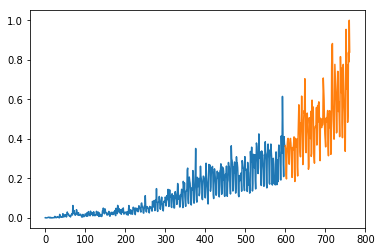

In [163]:
plt.plot(train)
plt.plot(test)

In [164]:
trainX = np.array(train)
X_train = list()
Y_train = list()

for i in range(len(trainX) - 20):
    X_train.append(trainX[i:i+20])
    Y_train.append(trainX[i+20])

In [165]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [166]:
X_train.shape

(580, 20, 1)

In [167]:
Y_train.shape

(580, 1)

In [168]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(100, input_shape = (20,1), return_sequences = True))
model.add(LSTM(100))
model.add(Dense(1))
model.summary()
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, Y_train, epochs=100, batch_size=32, verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_19 (LSTM)               (None, 20, 100)           40800     
_________________________________________________________________
lstm_20 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 101       
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
580/580 [==============================] - 4s 7ms/step - loss: 0.0081
Epoch 2/100
580/580 [==============================] - 1s 1ms/step - loss: 0.0030
Epoch 3/100
580/580 [==============================] - 1s 1ms/step - loss: 0.0025
Epoch 4/100
580/580 [==============================] - 1s 1ms/step - loss: 0.0026
Epoch 5/100
580/580 [==============================] - 1s 1ms/step - los

580/580 [==============================] - 1s 2ms/step - loss: 0.0012
Epoch 91/100
580/580 [==============================] - 1s 2ms/step - loss: 0.0013 ETA: 0s - loss
Epoch 92/100
580/580 [==============================] - 1s 2ms/step - loss: 0.0012
Epoch 93/100
580/580 [==============================] - 1s 2ms/step - loss: 0.0012
Epoch 94/100
580/580 [==============================] - 1s 2ms/step - loss: 0.0011
Epoch 95/100
580/580 [==============================] - 1s 2ms/step - loss: 0.0011
Epoch 96/100
580/580 [==============================] - 1s 2ms/step - loss: 0.0012
Epoch 97/100
580/580 [==============================] - 1s 2ms/step - loss: 0.0013
Epoch 98/100
580/580 [==============================] - 1s 2ms/step - loss: 0.0012
Epoch 99/100
580/580 [==============================] - 1s 2ms/step - loss: 0.0011
Epoch 100/100
580/580 [==============================] - 1s 2ms/step - loss: 0.0012


In [169]:
import math
# make predictions
trainPredict = model.predict(X_train)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
Y_train = scaler.inverse_transform(Y_train)

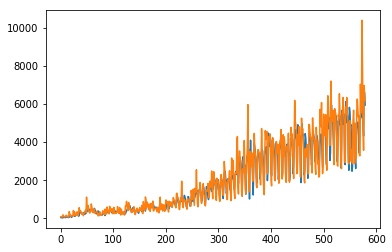

In [170]:
plt.plot(trainPredict)
plt.plot(Y_train)

In [171]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(Y_train, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))

Train Score: 565.99 RMSE


In [172]:
testX = np.array(test)
X_test = list()
Y_test = list()

for i in range(len(testX) - 20):
    X_test.append(testX[i:i+20])
    Y_test.append(testX[i+20])

In [173]:
X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [174]:
X_test.shape

(142, 20, 1)

In [175]:
Y_test.shape

(142, 1)

In [176]:
# make predictions
testPredict = model.predict(X_test)

# invert predictions
testPredict = scaler.inverse_transform(testPredict)
Y_test = scaler.inverse_transform(Y_test)

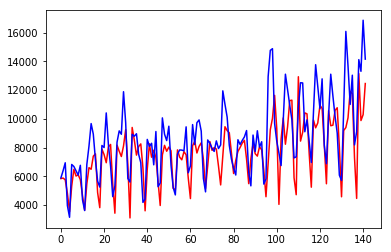

In [177]:
plt.plot(testPredict,color="red")
plt.plot(Y_test,color="blue")

In [178]:
# calculate root mean squared error
testScore = math.sqrt(mean_squared_error(Y_test, testPredict))
print('Train Score: %.2f RMSE' % (testScore))

Train Score: 2005.74 RMSE
